In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import networkx as nx
import statsmodels.api as sm
from glob import glob

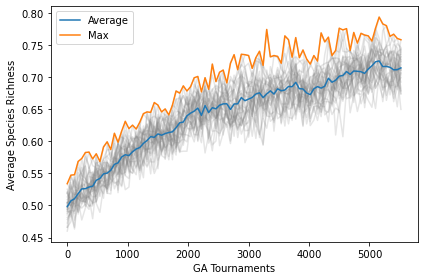

In [42]:
df_list = []
for file in glob('../data/complete/fitness*.csv'):
    df_single = pd.read_csv(file)
    times = df_single['time'].values
    df_list.append(df_single.drop('time', axis = 1).values)

fitnesses = np.array(df_list).mean(axis=0)[:, :-1]
avg_fit = fitnesses.mean(axis=1)
max_fit = fitnesses.max(axis=1)
plt.plot(times, fitnesses, c='grey', alpha=0.2)

plt.plot(times, avg_fit, c='C0', label = 'Average')
plt.plot(times, max_fit, c='C1', label = 'Max')
plt.legend()
plt.xlabel('GA Tournaments')
plt.ylabel('Average Species Richness')
plt.tight_layout()
plt.savefig('../figures/fitness.png')
plt.savefig('../figures/fitness.pdf')
plt.show()

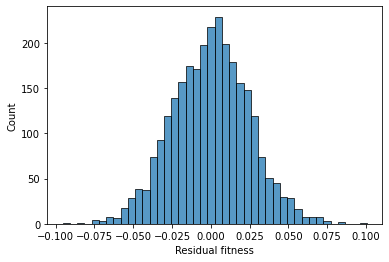

In [43]:
times_long = times.repeat(30)


residuals = (fitnesses.T - avg_fit).flatten()
sns.histplot(residuals)
plt.xlabel('Residual fitness')
plt.savefig('../figures/residual-fitness.png')
plt.savefig('../figures/residual-fitness.pdf')

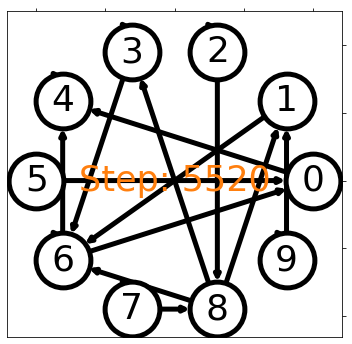

In [27]:
# use network 28
# load all of these networks in networkx form throw into a list
network_times = sorted(glob('../data/complete/networks2/*'))
net_list = []
step_nums = []

for dir in sorted(network_times):
    step_num = dir.split('/')[-1]
    step_nums.append(int(step_num))
    am = pd.read_csv(dir + '/28_adjmat_10.csv', header=None).values[:, :-1]
    D = nx.from_numpy_array(am, create_using=nx.DiGraph)
    net_list.append(D)

sort_idx = np.argsort(step_nums)
steps = np.sort(step_nums)
net_list = [net_list[i] for i in sort_idx]

fig, ax = plt.subplots(figsize=(6,6))
pos_dict = nx.circular_layout(net_list[i], scale=1)
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
def animate(i):
    ax.clear()
    nx.draw_networkx(net_list[i], pos=pos_dict, ax=ax, **options)
    ax.text(0, 0, 'Step: {}'.format(i*60), c='C1', ha='center', va='center', size=35)

ani = FuncAnimation(fig, animate, frames=len(net_list), interval=250)
ani.save('../figures/animate.gif')

In [12]:
# load all networks
network_times = [network_times[i] for i in sort_idx]
node_ids = np.arange(30)
m_edges = np.zeros((len(sort_idx), len(node_ids)))
cycles = np.zeros((len(sort_idx), len(node_ids)))
comps = np.zeros((len(sort_idx), len(node_ids)))

# self-edges
se = [(i, i) for i in range(30)]
for step, dir in enumerate(network_times):
    for i in range(30):
        for j in range(10):
            if (j, j) in D.edges:
                D.remove_edge(j, j)
        am = pd.read_csv(dir + '/' + str(i) + '_adjmat_10.csv', header=None).values[:, :-1]
        D = nx.from_numpy_array(am, create_using=nx.DiGraph)
        m_edges[step][i] = len(D.edges)
        cycle = [len(x) for x in list(nx.cycles.simple_cycles(D))]
        cycles[step][i] = np.max(cycle)
        max_component = np.max([len(x) for x in list(nx.strongly_connected_components(D))])
        comps[step][i] = max_component


        # if step == max(sort_idx):
        #     for j in range(10):
        #         if (j, j) in D.edges:
        #             D.remove_edge(j, j)
        #     nx.write_edgelist(D, '../data/complete1/networks_mfinder/mfinder_{}.txt'.format(i), delimiter=' ', data=False)


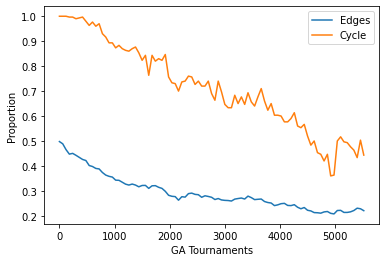

In [30]:
avg_edges = (m_edges / 100).mean(axis=1)
avg_cycle = cycles.mean(axis=1) / 10
plt.plot(times, avg_edges, label='Edges')
plt.plot(times, avg_cycle, label='Cycle')
plt.legend()
plt.xlabel('GA Tournaments')
plt.ylabel('Proportion')
plt.savefig('../figures/edges_cycles.png')

In [14]:
D = nx.from_edgelist([(0, 1), (1, 3), (0, 3), (3, 0)], create_using=nx.DiGraph)
list(nx.simple_cycles(D))

[[0, 3], [0, 1, 3]]

In [19]:
df_list

[    time         0         1         2         3         4         5  \
 0     -1  0.806667  0.680000  0.633333  0.660000  0.760000  0.713333   
 1      0  0.760000  0.720000  0.700000  0.660000  0.766667  0.693333   
 2     80  0.753333  0.700000  0.626667  0.760000  0.760000  0.653333   
 3    160  0.720000  0.646667  0.626667  0.800000  0.760000  0.793333   
 4    240  0.733333  0.640000  0.633333  0.680000  0.780000  0.773333   
 5    320  0.740000  0.600000  0.620000  0.880000  0.706667  0.806667   
 6    400  0.733333  0.586667  0.760000  0.880000  0.700000  0.780000   
 7    480  0.733333  0.660000  0.660000  0.880000  0.793333  0.760000   
 8    560  0.713333  0.666667  0.700000  0.846667  0.753333  0.720000   
 9    640  0.786667  0.720000  0.700000  0.820000  0.686667  0.680000   
 10   720  0.733333  0.740000  0.740000  0.820000  0.720000  0.840000   
 11   800  0.786667  0.660000  0.760000  0.820000  0.760000  0.800000   
 12   880  0.593333  0.720000  0.720000  0.686667  

In [21]:
np.array(df_list).shape

(5, 93, 31)

In [25]:
fitnesses.shape

(93, 30)

In [44]:
times_long

array([   0,    0,    0, ..., 5520, 5520, 5520])